# Info
This is a notebook for self build linear regression model

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

# Creating sample data

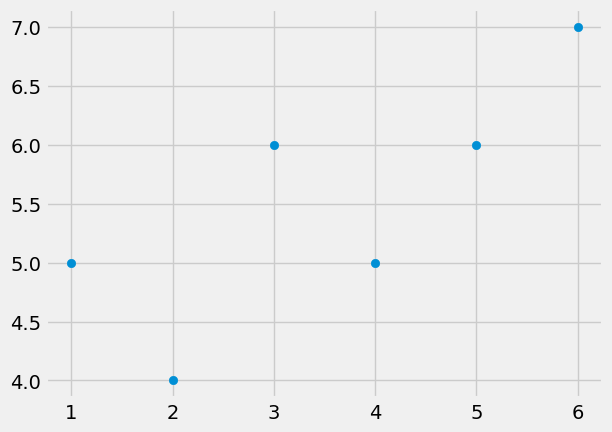

In [58]:
X = np.array([1, 2, 3, 4, 5, 6], dtype = np.float64)
Y = np.array([5, 4, 6, 5, 6, 7], dtype = np.float64)
plt.scatter(X, Y)
plt.show()

# Defining the function

## Get slope function

In [59]:
def best_fit_slope(x, y):
    k = (np.mean(x) * np.mean(y) - np.mean(x * y))/(np.mean(x)**2 - np.mean(x**2))
    return k

## Get intercept Function

In [60]:
def best_fit_intercept(x, y):
    b = np.mean(y) - best_fit_slope(x, y) * np.mean(x)
    return b

In [61]:
k = best_fit_slope(X, Y)
b = best_fit_intercept(X, Y)
print(best_fit_slope(X, Y))
print(best_fit_intercept(X, Y))
regression_line = [(k * x) + b for x in X]

0.42857142857142866
4.0


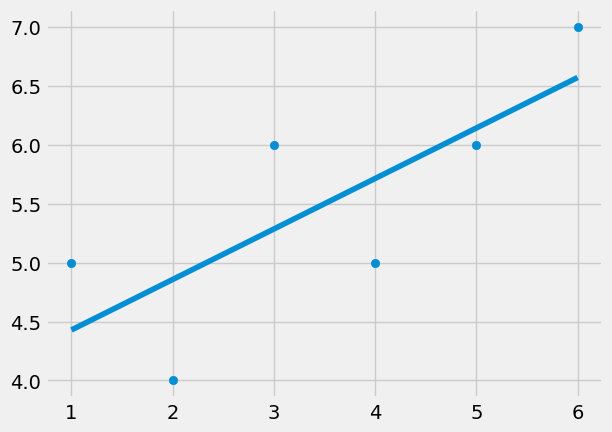

In [62]:
plt.scatter(X, Y)
plt.plot(X, regression_line)
plt.show()

# How to predict

In [63]:
predict_X = 9
predict_Y = k * predict_X + b

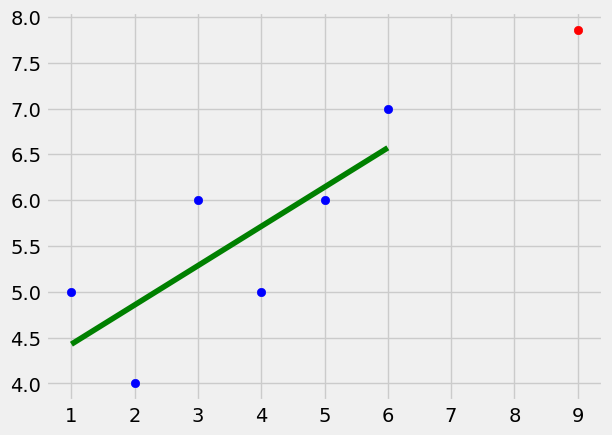

In [64]:
plt.scatter(X, Y, color = 'b')
plt.plot(X, regression_line, color = 'g')
plt.scatter(predict_X, predict_Y, color = 'r')
plt.show()

# Getting the squared error

### Function to calculate the suqared error for both.

In [65]:
def squared_error(line_a, line_b):
    return sum((line_a - line_b) ** 2)

### Function to calculate the R squared

In [66]:
def coefficient_of_determination(line_y, line_y_hat):
    line_y_mean = [np.mean(line_y) for y in line_y]
    sum_of_squared_residuals = squared_error(line_y, line_y_hat)
    total_sum_of_squares = squared_error(line_y, line_y_mean)
    return (1 - ((sum_of_squared_residuals)/(total_sum_of_squares)))

## Run the function to check for accuracy

In [67]:
print(coefficient_of_determination(Y, regression_line))

0.5844155844155845
